In [1]:
# importa libs necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#ler dados
base = pd.read_csv('/home/viktor/Documentos/Personal/Empresa_Unicornio/startups_2021.csv',parse_dates=['Date Joined'])

# #verifica a dimensão
base.shape

(936, 8)

In [3]:
#primeiros registros
base.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
#colunas
base.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [5]:
#renomeia
base.rename(columns={'Unnamed: 0' : 'ID', 'Company' : 'Empresa', 'Valuation ($B)' : 'Valor', 'Date Joined' : 'Data de Adesão', 'Country' : 'Pais',
       'City' : 'Cidade', 'Industry' : 'Setor', 'Select Investors' : 'Investidores'}, inplace = True)

In [6]:
#informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              936 non-null    int64         
 1   Empresa         936 non-null    object        
 2   Valor           936 non-null    object        
 3   Data de Adesão  936 non-null    datetime64[ns]
 4   Pais            936 non-null    object        
 5   Cidade          921 non-null    object        
 6   Setor           936 non-null    object        
 7   Investidores    935 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 58.6+ KB


In [7]:
# converte
base['Valor'] = base['Valor'].str.replace('$', '').astype('float') 

##outra forma:
# base['Valor'] = pd.to_numeric(base['Valor'].apply(lambda linha : linha.replace('$', '')))

In [9]:
# campos nulos
base.isnull().sum()

ID                 0
Empresa            0
Valor              0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

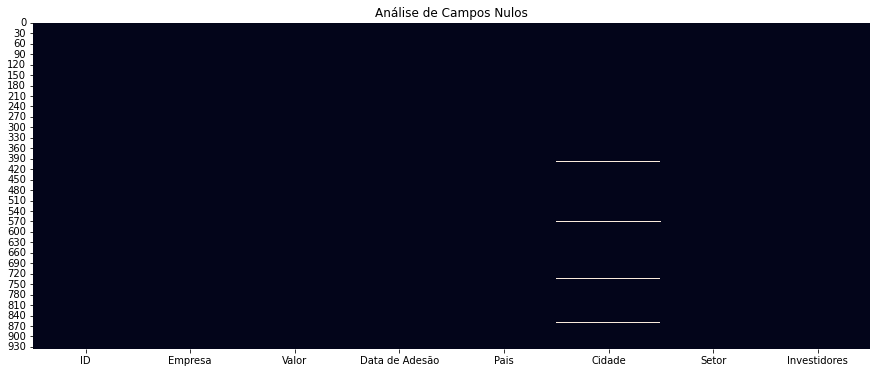

In [14]:
# gráfica
plt.figure(figsize=(15, 6))
plt.title('Análise de Campos Nulos')
sns.heatmap(base.isnull(), cbar = False)
plt.show()

In [16]:
# campos unicos
base.nunique()

ID                936
Empresa           935
Valor             192
Data de Adesão    589
Pais               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [17]:
# verificar valores unicos
base['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [18]:
# valores unicos - contagem
base['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [28]:
# valores unicos - percentual da divisão
round(base['Setor'].value_counts(normalize=True) * 100, 1)

Fintech                                20.3
Internet software & services           17.8
E-commerce & direct-to-consumer        10.9
Artificial intelligence                 7.4
Health                                  6.7
Supply chain, logistics, & delivery     5.4
Other                                   5.4
Cybersecurity                           4.4
Mobile & telecommunications             4.0
Data management & analytics             3.8
Hardware                                3.4
Auto & transportation                   3.1
Edtech                                  2.9
Consumer & retail                       2.5
Travel                                  1.4
Artificial Intelligence                 0.4
Finttech                                0.1
Name: Setor, dtype: float64

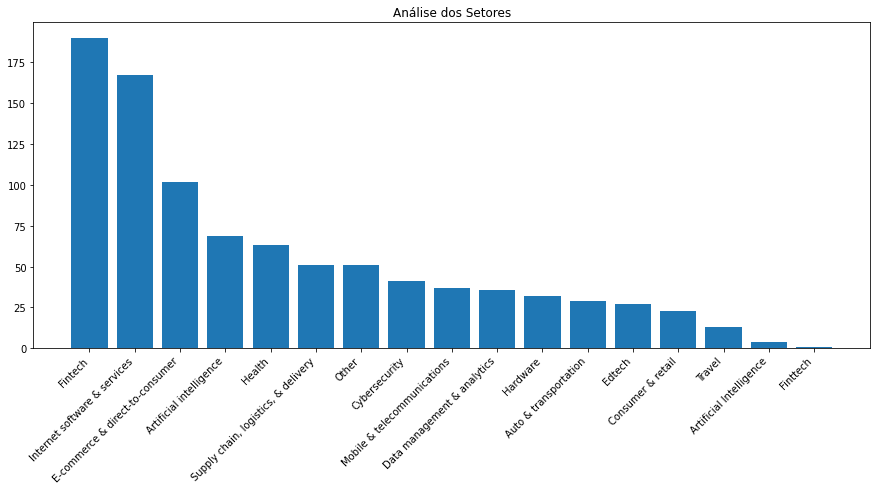

In [24]:
# grafico
plt.figure(figsize=(15,6))
plt.title('Análise dos Setores')
plt.bar(base['Setor'].value_counts().index, base['Setor'].value_counts())
plt.xticks(rotation=45, ha='right')
plt.show()

In [29]:
# analise de paises
analise_paises = round(base['Pais'].value_counts(normalize=True) * 100, 1)

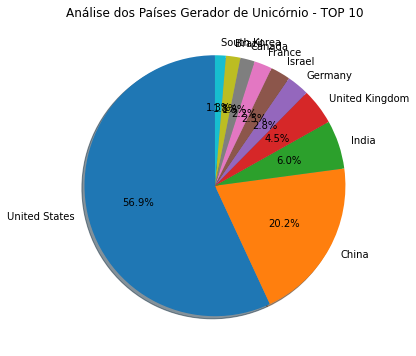

In [39]:
# grafico
plt.figure(figsize=(15,6))
plt.title('Análise dos Países Gerador de Unicórnio - TOP 10')
plt.pie(
    analise_paises.head(10),
    labels = analise_paises.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%')
plt.show()

In [41]:
# extrai ano e mês
base['Mes'] = pd.DatetimeIndex(base['Data de Adesão']).month
base['Ano'] = pd.DatetimeIndex(base['Data de Adesão']).year
base.head()

,ID,Empresa,Valor,Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [47]:
# tbl analitica
analise_agrupada = base.groupby(by=['Pais', 'Ano', 'Mes', 'Empresa']).count()['ID'].reset_index()
analise_agrupada

,Pais,Ano,Mes,Empresa,ID
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [48]:
#analise por país
analise_agrupada.loc[
    analise_agrupada['Pais']=='Brazil']

,Pais,Ano,Mes,Empresa,ID
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [51]:
#analise por país e valor
base.groupby(by=['Pais']).sum()['Valor'].reset_index().sort_values('Valor',ascending=False)

,Pais,Valor
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45
